In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
#muestra que se quiere comparar

sample_path = r"\BaseDatosNISTsd09_pr"
sample_path = os.getcwd()+sample_path
files= os.listdir(sample_path)

# Busca en el directorio a cada uno de los sujetos
counter=0 
print(files)
for file in files:
    dir = sample_path +'\\'
    dir = dir + file + '\\'
    file2= os.listdir(dir)
    ruta=dir+'\\'+file2[0]
    sample = cv.imread(ruta) #muestras para tomar de referencia
    counter+=1
    #segundo bucle para comparar con todas
    for file in files:
        dir = sample_path +'\\'
        dir = dir + file + '\\'
        file2= os.listdir(dir)
        ruta=dir+'\\'+file2[1] 
        sample2 = cv.imread(ruta) #muestras para tomar de referencia
     
    
    
    

['crd_0811f', 'crd_0812f', 'crd_0813f', 'crd_0814f', 'crd_0815f', 'crd_0816f', 'crd_0817f', 'crd_0818f', 'crd_0819f', 'crd_0820f']


A partir de la base de datos proporcionada, se realizará un programa que permita identificar las huellas del mismo usuario y descartar el resto, dando información cuantitativa de la similitud entre las huellas, pudiendo utilizar openCV, numpy, os, PyTorch,..., pero no funciones descargadas especialmente para trabajar con huellas dactilares.

Se obtendrá la función densidad de probabilidad, la curva DET, la curva ROC., el valor EER y el valor AUC.

Se realizará un póster (una única transparencia) y se presentará durante la última semana de clase. Además, se entregará el código usado.

En la presentación tienen que tratarse los siguientes puntos:

-Hipótesis de partida.

-Metodología utilizada y explicación de su desarrollo.

-Resultados (curvas, EER y AUC).

-Conclusiones.

-Fuentes principales consultadas.

In [3]:
#TODO:
# 1. Limpieza: id y separar la huella
# 2. Eliminación de ruido

#TODO: Data augmentation
# 1. Rotación: tener en cuenta el fondo
# luminosidad

#TODO: Moselo / sistema / lo q sea
# SIFT
# CONVOLUTIVA

# MATCHING DE PATRONES

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

## 1. Limpieza del dataset

### 1.2. Extraer la huella de la imagen

In [6]:
from clean_dataset.functions import binarize, cut_image, write_image
from clean_dataset.functions_2  import enhance_fingerprint, reduce_noise, equalize_histogram, skeletonize_fingerprint

In [ ]:
dataset_path = "./Datasets"
image = cv.imread(dataset_path + '\\crd_0819f\\crd_0819s_01.png', 0)  # Leer la imagen en escala de grises

noisy_reduced_image = reduce_noise(image)

# Ecualizar el histograma para mejorar el contraste
equalized_image = equalize_histogram(noisy_reduced_image)

# Mejorar la imagen de la huella dactilar
enhanced_image = enhance_fingerprint(equalized_image)

# Obtener el esqueleto de la huella dactilar
skeleton_image = skeletonize_fingerprint(enhanced_image)
skeleton_image = (skeleton_image * 255).astype(np.uint8)

# Guardar y mostrar las imágenes procesadas
cv.imwrite('huella_dactilar_reducida_ruido.png', noisy_reduced_image)
cv.imwrite('huella_dactilar_ecualizada.png', equalized_image)
cv.imwrite('huella_dactilar_mejorada.png', enhanced_image)
cv.imwrite('huella_dactilar_esqueleto.png', skeleton_image)

cv.imshow('Original', image)
cv.imshow('Ruido Reducido', noisy_reduced_image)
cv.imshow('Ecualizada', equalized_image)
cv.imshow('Mejorada', enhanced_image)
cv.imshow('Esqueleto', skeleton_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [44]:
def build_dataset(sample_path, subfolders, dataset_path):
    for subfolder in subfolders:
        path = os.listdir(sample_path+'\\'+subfolder)
        output_folder = dataset_path + '/' + subfolder
        if not os.path.exists(output_folder):
            os.mkdir(output_folder)

        for file in path:
            route = sample_path+'\\'+subfolder+'\\'+file
            img = cv.imread(route)
            gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

            binary = binarize(gray)
            cutted_image = cut_image(img, binary)
            write_image(cutted_image, output_folder, file)

In [48]:
def build_dataset_frangi(sample_path, subfolders, dataset_path):
    for subfolder in subfolders:
        path = os.listdir(sample_path+'\\'+subfolder)
        output_folder = dataset_path + '/' + subfolder
        if not os.path.exists(output_folder):
            os.mkdir(output_folder)

        for file in path:
            route = sample_path+'\\'+subfolder+'\\'+file
            img = cv.imread(route, 0)
        
            noisy_reduced_image = reduce_noise(img)

            equalized_image = equalize_histogram(noisy_reduced_image)
            enhanced_image = enhance_fingerprint(equalized_image)
            skeleton_image = skeletonize_fingerprint(enhanced_image)
            skeleton_image = (skeleton_image * 255).astype(np.uint8)

            output_path = os.path.join(output_folder, file)
            
            imagen_resized = cv.resize(skeleton_image, (512, 512), interpolation=cv.INTER_LINEAR)
    
            cv.imwrite(output_path, skeleton_image)


In [49]:
sample_path = r"\BaseDatosNISTsd09_pr"
dataset_path = "./Datasets"
dataset_path = "./frangi_dataset"
sample_path = os.getcwd()+sample_path
subfolders= os.listdir(sample_path)
porcentaje = 0.90

build_dataset_frangi("./Datasets", subfolders, dataset_path)

### 1.3. Eliminación de ruido

## 2. Aumento de datos (Data Augmentation)

## 3. Planteamiento del sistema

### 3.1. SIFT

In [27]:
sitfs = {}

sample_path = r"\BaseDatosNISTsd09_pr"
dataset_path = "./Datasets"
dataset_path = "./frangi_dataset"
sample_path = os.getcwd() + sample_path
subfolders = os.listdir(sample_path)
i = 0

for subfolder in subfolders:
    path = os.listdir(dataset_path + '\\' + subfolder)
    route = dataset_path + '\\' + subfolder + '\\' + path[0]

    img = cv.imread(route)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    sift = cv.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)
    sitfs[path[0]] = (kp, des, img)
    if i == 6:
        break
    i += 1

In [28]:
print(len(sitfs))

7


In [31]:
query_path = dataset_path + '\\crd_0818f\\crd_0818s_01.png'
query_img = cv.imread(query_path)
query_gray = cv.cvtColor(query_img, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp_query, des_query = sift.detectAndCompute(query_gray, None)

bf = cv.BFMatcher()

best_match_name = None
best_match_img = None
best_match_kp = None
best_good_matches = []

for name, (kp_database, des_database, img_database) in sitfs.items():
    matches = bf.knnMatch(des_query, des_database, k=2)
    
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    if len(good_matches) > len(best_good_matches):
        best_good_matches = good_matches
        best_match_name = name
        best_match_img = img_database
        best_match_kp = kp_database



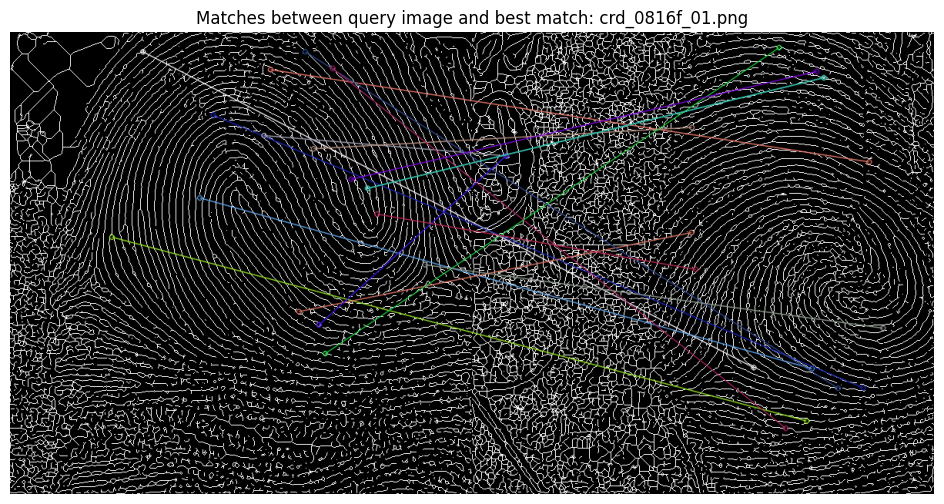

In [32]:
if best_match_img is not None:
    matched_image = cv.drawMatches(query_img, kp_query, best_match_img, best_match_kp, best_good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(cv.cvtColor(matched_image, cv.COLOR_BGR2RGB))
    plt.title(f"Matches between query image and best match: {best_match_name}")
    plt.axis('off')
    plt.show()
else:
    print("No matches found")

In [104]:
import cv2 as cv
import torchvision.models as models
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
import numpy as np
import os
from scipy.spatial.distance import cosine, euclidean

In [123]:
def extract_features(img_path, model):
    model.eval()
    image = cv.imread(img_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    preprocess = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = preprocess(image).unsqueeze(0)

    with torch.no_grad():
        features = model(image).squeeze().numpy()
    return features

def compare_fingerprints(users, v2, threshold=0.12):
    for idx, user in enumerate(users):
        user = user.flatten() if user.ndim > 1 else user
        v2 = v2.flatten() if v2.ndim > 1 else v2
        
        distance = cosine(user, v2)
        print(f"Distance with user {idx}: {distance}")
        if distance < threshold:
            print(f"Match found with user {distance} at index {idx}")
            print("-------------------------------------------------------")
            return idx
    return None

In [124]:
model = models.resnet50(pretrained=True)
model = nn.Sequential(*list(model.children())[:-1])

In [125]:
users = []
sample_path = r"\BaseDatosNISTsd09_pr"
dataset_path = "./Datasets"
sample_path = os.getcwd() + sample_path
subfolders = os.listdir(sample_path)

for i, subfolder in enumerate(subfolders[:6]):
    path = os.listdir(dataset_path + '\\' + subfolder)
    route = dataset_path + '\\' + subfolder + '\\' + path[0]
    vector = extract_features(route, model)
    users.append(vector)

In [126]:
matches = 0
total_checks = 0

for subfolder in subfolders:
    path = os.listdir(dataset_path + '\\' + subfolder)
    
    for file_name in path:
        route = dataset_path + '\\' + subfolder + '\\' + file_name
        v2 = extract_features(route, model)
        
        result = compare_fingerprints(users, v2)
        
        if result is not None:
            #print(f"Match found for folder '{subfolder}' with index {result}")
            matches += 1
        else:
            print(f"No match found for folder '{subfolder}'")
        
        total_checks += 1

accuracy = matches / total_checks if total_checks > 0 else 0
print(f"Accuracy: {accuracy * 100:.2f}% ({matches}/{total_checks})")

Distance with user 0: 0.0
Match found with user 0.0 at index 0
-------------------------------------------------------
Distance with user 0: 0.08758842945098877
Match found with user 0.08758842945098877 at index 0
-------------------------------------------------------
Distance with user 0: 0.14687985181808472
Distance with user 1: 0.0
Match found with user 0.0 at index 1
-------------------------------------------------------
Distance with user 0: 0.08757197856903076
Match found with user 0.08757197856903076 at index 0
-------------------------------------------------------
Distance with user 0: 0.11098814010620117
Match found with user 0.11098814010620117 at index 0
-------------------------------------------------------
Distance with user 0: 0.11199730634689331
Match found with user 0.11199730634689331 at index 0
-------------------------------------------------------
Distance with user 0: 0.13941192626953125
Distance with user 1: 0.10942977666854858
Match found with user 0.10942977

In [78]:
for subfolder in subfolders:
    files = os.listdir(dataset_path + '\\' + subfolder)

    for route_file in files:
        route = dataset_path + '\\' + subfolder + '\\' + route_file

        v2 = extract_features(route, model)
        distance = compare_fingerprints(users, v2)

In [54]:
vgg16 = models.vgg16(pretrained=True)
print(vgg16)
vgg16_latent = nn.Sequential(*list(vgg16.children())[:-1])
print(vgg16_latent)

c:\Users\Susana\anaconda3\envs\piav\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Susana\anaconda3\envs\piav\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [52]:
vgg16_latent.eval()
vectors = {}
sample_path = r"\BaseDatosNISTsd09_pr"
dataset_path = "./Datasets"
dataset_path = "./frangi_dataset"
sample_path = os.getcwd() + sample_path
subfolders = os.listdir(sample_path)
i = 0

for subfolder in subfolders:

    path = os.listdir(dataset_path + '\\' + subfolder)
    route = dataset_path + '\\' + subfolder + '\\' + path[0]

    img = cv.imread(route)
    img = cv.resize(img, (224, 224))
    img = torch.from_numpy(img).permute(2, 0, 1).unsqueeze(0).float()

    with torch.no_grad():
        vector = vgg16_latent(img)

    vectors[path[0]] = vector

    if i == 6:
        break
    i += 1
    

In [53]:
print(vectors)

{'crd_0811f_01.png': tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, 15.5075,  5.5852,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  2.6924,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         